In [1]:
import cv2
import numpy as np
import time
import os
import matplotlib.pyplot as plt


In [2]:
# getting classes names
labels_path = "darknet/data/coco.names"
labels = open(labels_path).read().strip().split("\n")
len(labels)


80

In [3]:
weights_path = "darknet/yolov4.weights"
config_path = "darknet/cfg/yolov4.cfg"


In [4]:
# loading model (cnn)
net = cv2.dnn.readNetFromDarknet(config_path, weights_path)


OpenCV Configuration

In [5]:
COLORS = np.random.randint(0, 255, size=(len(labels), 3), dtype="uint8") # colors for class bounding boxes


In [6]:
ln = net.getLayerNames()
print('Total de camadas: ', len(ln))
print(ln)


Total de camadas:  379
('conv_0', 'bn_0', 'mish_1', 'conv_1', 'bn_1', 'mish_2', 'conv_2', 'bn_2', 'mish_3', 'identity_3', 'conv_4', 'bn_4', 'mish_5', 'conv_5', 'bn_5', 'mish_6', 'conv_6', 'bn_6', 'mish_7', 'shortcut_7', 'conv_8', 'bn_8', 'mish_9', 'concat_9', 'conv_10', 'bn_10', 'mish_11', 'conv_11', 'bn_11', 'mish_12', 'conv_12', 'bn_12', 'mish_13', 'identity_13', 'conv_14', 'bn_14', 'mish_15', 'conv_15', 'bn_15', 'mish_16', 'conv_16', 'bn_16', 'mish_17', 'shortcut_17', 'conv_18', 'bn_18', 'mish_19', 'conv_19', 'bn_19', 'mish_20', 'shortcut_20', 'conv_21', 'bn_21', 'mish_22', 'concat_22', 'conv_23', 'bn_23', 'mish_24', 'conv_24', 'bn_24', 'mish_25', 'conv_25', 'bn_25', 'mish_26', 'identity_26', 'conv_27', 'bn_27', 'mish_28', 'conv_28', 'bn_28', 'mish_29', 'conv_29', 'bn_29', 'mish_30', 'shortcut_30', 'conv_31', 'bn_31', 'mish_32', 'conv_32', 'bn_32', 'mish_33', 'shortcut_33', 'conv_34', 'bn_34', 'mish_35', 'conv_35', 'bn_35', 'mish_36', 'shortcut_36', 'conv_37', 'bn_37', 'mish_38', 'c

In [7]:
print('Camadas de saida: ', net.getUnconnectedOutLayers())


Camadas de saida:  [327 353 379]


In [8]:
ln = [ln[i - 1] for i in net.getUnconnectedOutLayers()]
print('Camadas de saida: ', ln)


Camadas de saida:  ['yolo_139', 'yolo_150', 'yolo_161']


In [9]:
def display_pic(img):
    fig = plt.gcf()
    fig.set_size_inches(16,10)
    plt.axis("off")
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()
    print("Image shape: ", img.shape)


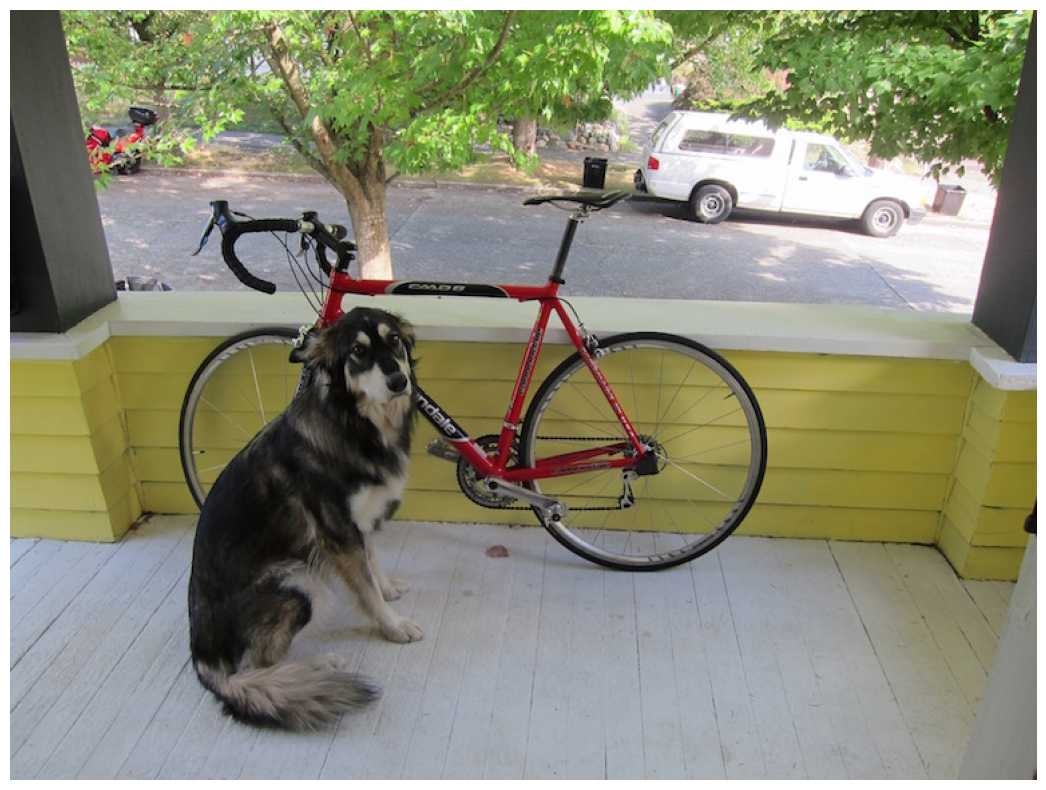

Image shape:  (576, 768, 3)


In [10]:
img = cv2.imread('darknet/data/dog.jpg')
display_pic(img)


In [11]:
img_cp = img.copy()
(H, W) = img.shape[:2]
H, W


(576, 768)

Proccessando a imagem de entrada

In [12]:
start = time.time()

blob = cv2.dnn.blobFromImage(img, 1/255.0, (416,416), swapRB=True, crop=False) # format the image for Yolo
net.setInput(blob) # set the input to the network
layer_outputs = net.forward(ln) # get the output from the network

end = time.time()

print(f"Yolo took {end - start:.2f} seconds")


Yolo took 0.42 seconds


Definindo variáveis

In [13]:
thresh = 0.5
thresh_NMS = 0.3
boxes = []
confidences = []
class_ids = []


Previsão com YOLO

In [14]:
len(layer_outputs)


3

In [15]:
layer_outputs[0], len(layer_outputs[0])


(array([[0.00763694, 0.0080324 , 0.01871806, ..., 0.        , 0.        ,
         0.        ],
        [0.01224081, 0.01536337, 0.02940092, ..., 0.        , 0.        ,
         0.        ],
        [0.014658  , 0.01428254, 0.05624032, ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.9938149 , 0.99006927, 0.01501971, ..., 0.        , 0.        ,
         0.        ],
        [0.986721  , 0.98371357, 0.02403543, ..., 0.        , 0.        ,
         0.        ],
        [0.98208183, 0.9846663 , 0.04800351, ..., 0.        , 0.        ,
         0.        ]], shape=(8112, 85), dtype=float32),
 8112)

In [55]:
for output in layer_outputs:
    for detection in output:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > thresh:
            print('scores: ' + str(scores))
            print('attriuted class: ' + str(labels[class_id]))
            print('confidence: ' + str(confidence))

            box = detection[0:4] * np.array([W, H, W, H])
            (center_x, center_y, width, height) = box.astype("int")
            x = int(center_x - (width / 2))
            y = int(center_y - (height / 2))

            boxes.append([x, y, int(width), int(height)])
            confidences.append(float(confidence))
            class_ids.append(class_id)



scores: [0.        0.        0.2612395 0.        0.        0.        0.
 0.8505297 0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.       ]
attriuted class: truck
confidence: 0.8505297
scores: [0.         0.         0.26008192 0.         0.         0.
 0.         0.85890776 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0. 

Aplicando a Non-Maxima Suppression

In [17]:
objs = cv2.dnn.NMSBoxes(boxes, confidences, thresh, thresh_NMS)


Mostrando o resultado das detecções

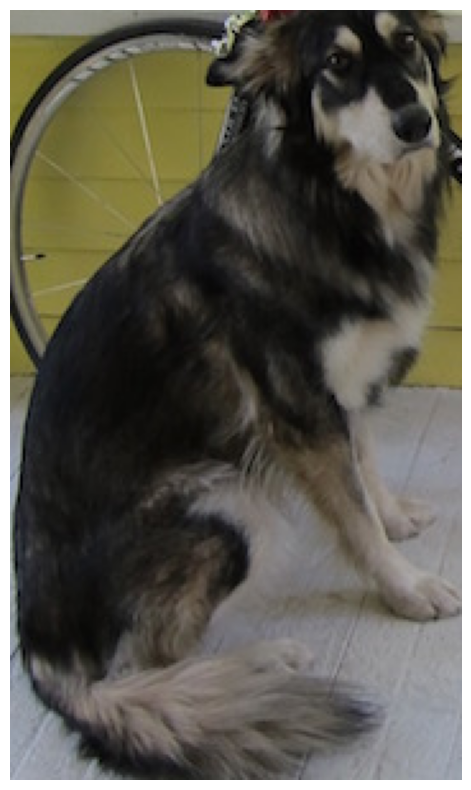

Image shape:  (302, 177, 3)


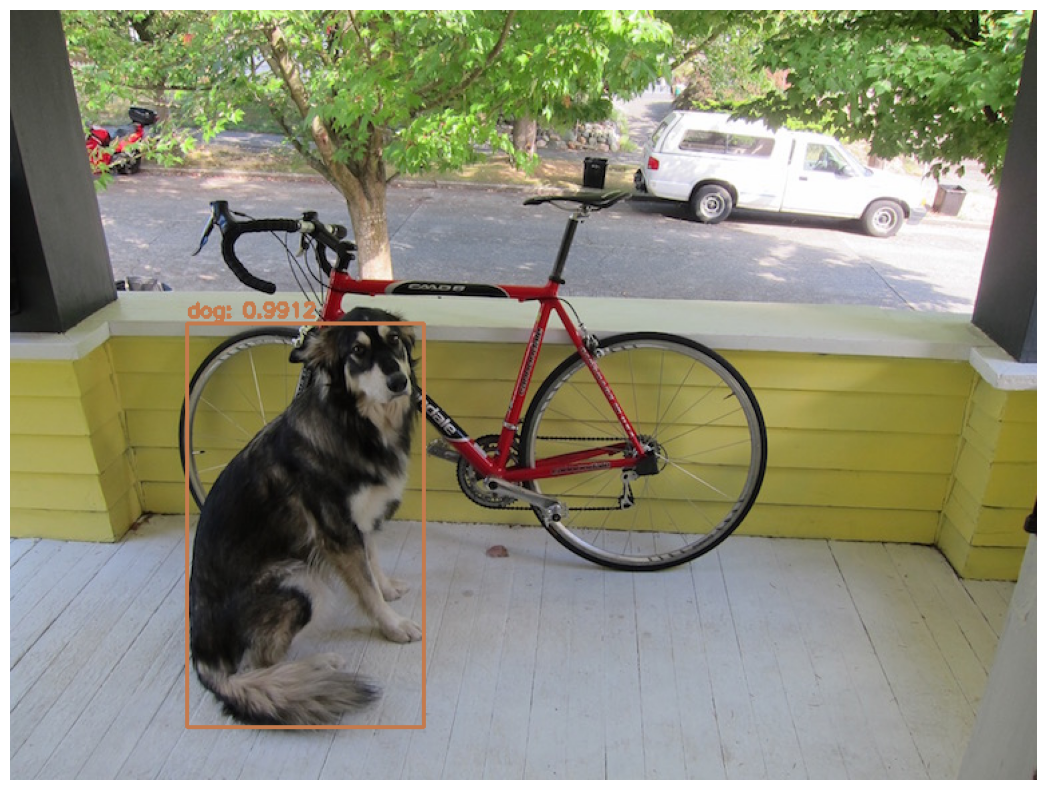

Image shape:  (576, 768, 3)


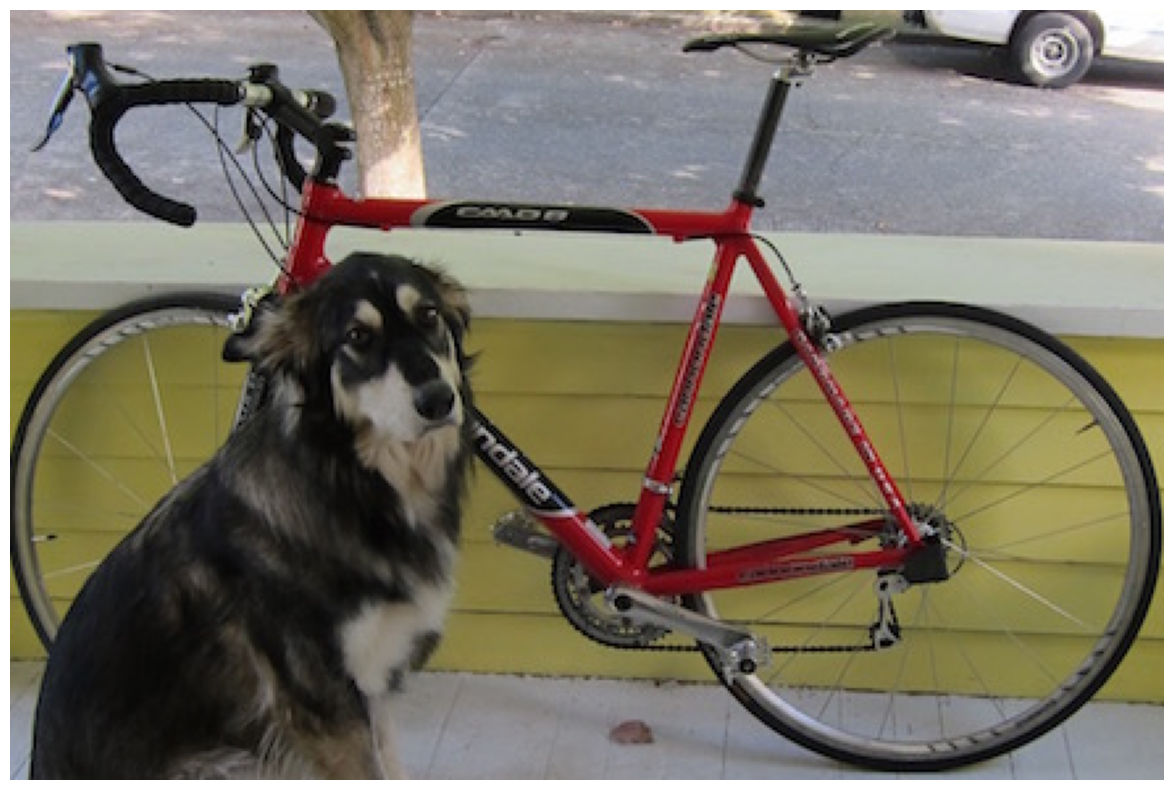

Image shape:  (293, 439, 3)


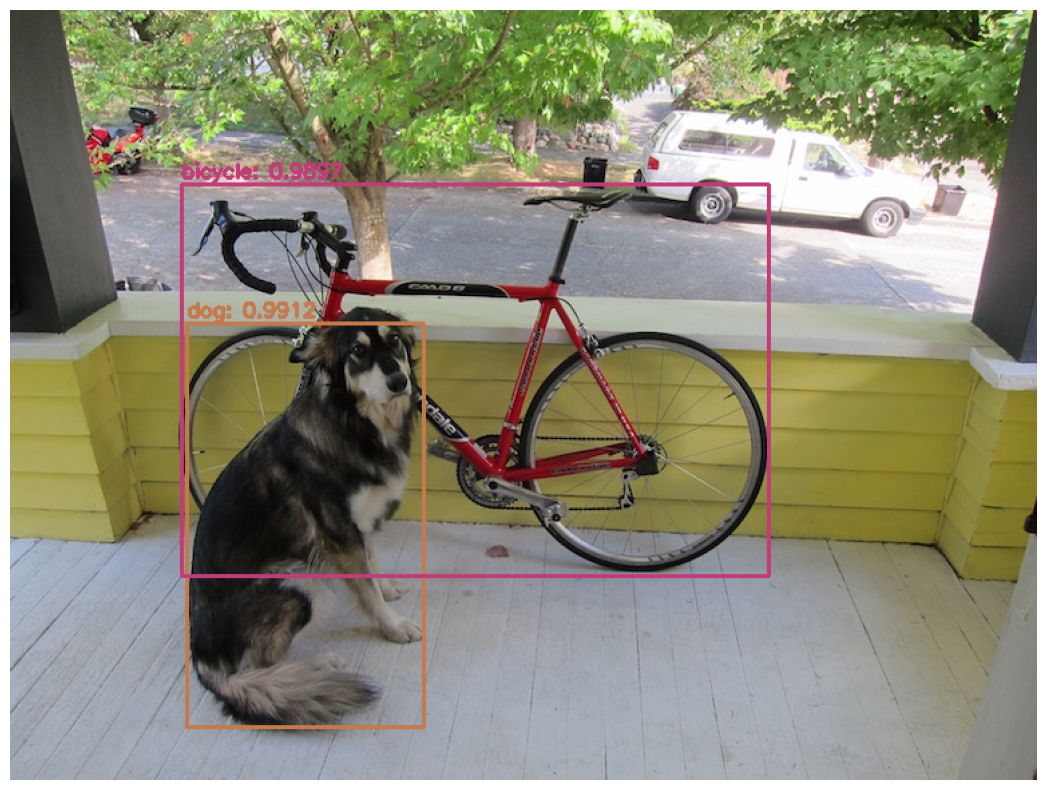

Image shape:  (576, 768, 3)


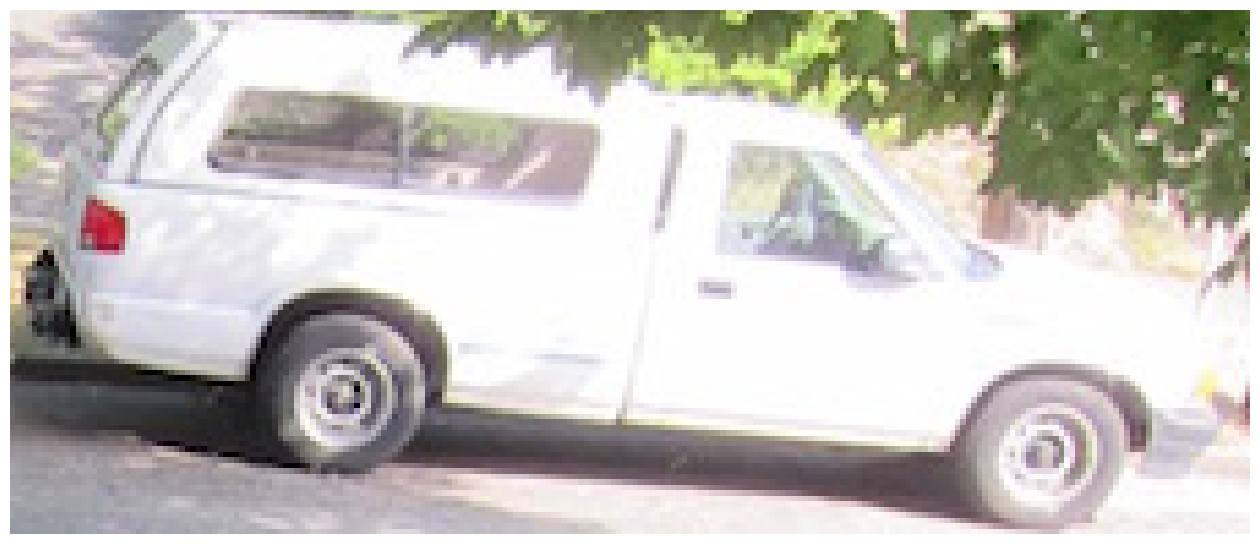

Image shape:  (96, 227, 3)


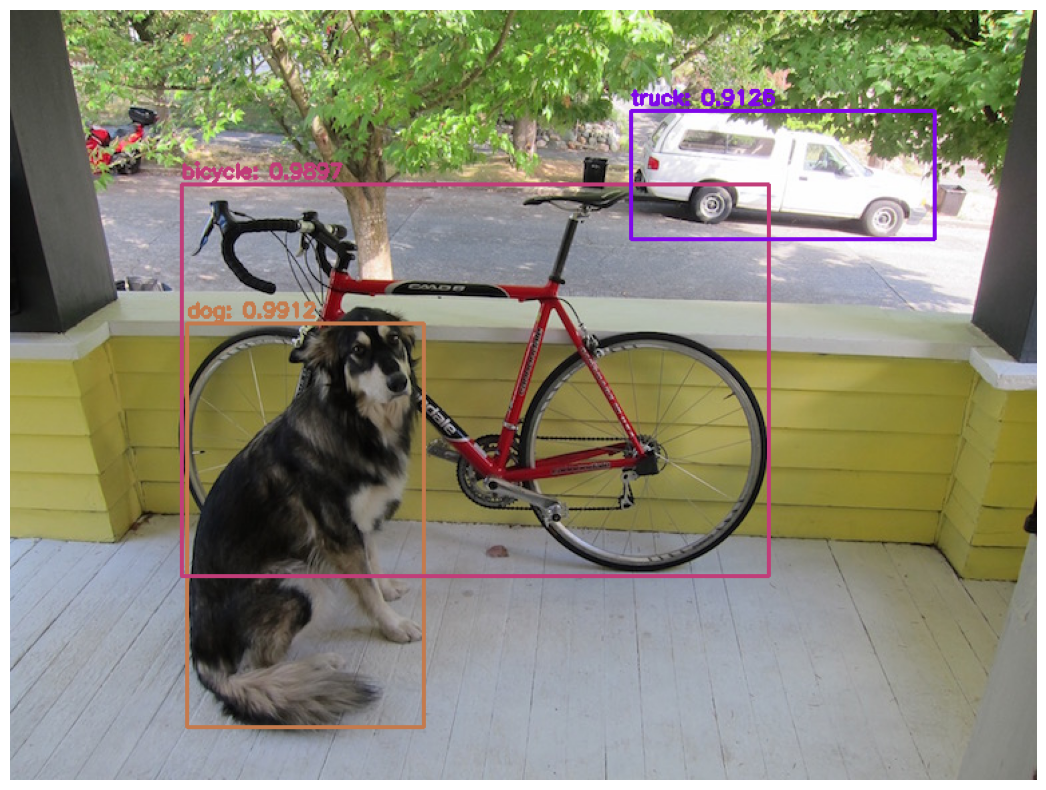

Image shape:  (576, 768, 3)


In [18]:
# vendo objetos detectados
if len(objs) > 0:
    for i in objs.flatten():
        (x, y) = (boxes[i][0], boxes[i][1])
        (w, h) = (boxes[i][2], boxes[i][3])

        object = img_cp[y:y+h, x:x+w]
        display_pic(object)

        color = [int(c) for c in COLORS[class_ids[i]]]

        cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
        text = "{}: {:.4f}".format(labels[class_ids[i]], confidences[i])
        cv2.putText(img, text, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
        display_pic(img)


## Preprocessamentos

#### Redimensionando a imagem

In [19]:
def resize(img, max_width=600):
    if img.shape[1] > max_width:
        proportion = img.shape[1] / img.shape[0]
        img_width = max_width
        img_height = int(img_width / proportion)
    else:
        img_width = img.shape[1]
        img_height = img.shape[0]
    
    img = cv2.resize(img, (img_width, img_height))
    return img


In [20]:
img_2 = resize(img)


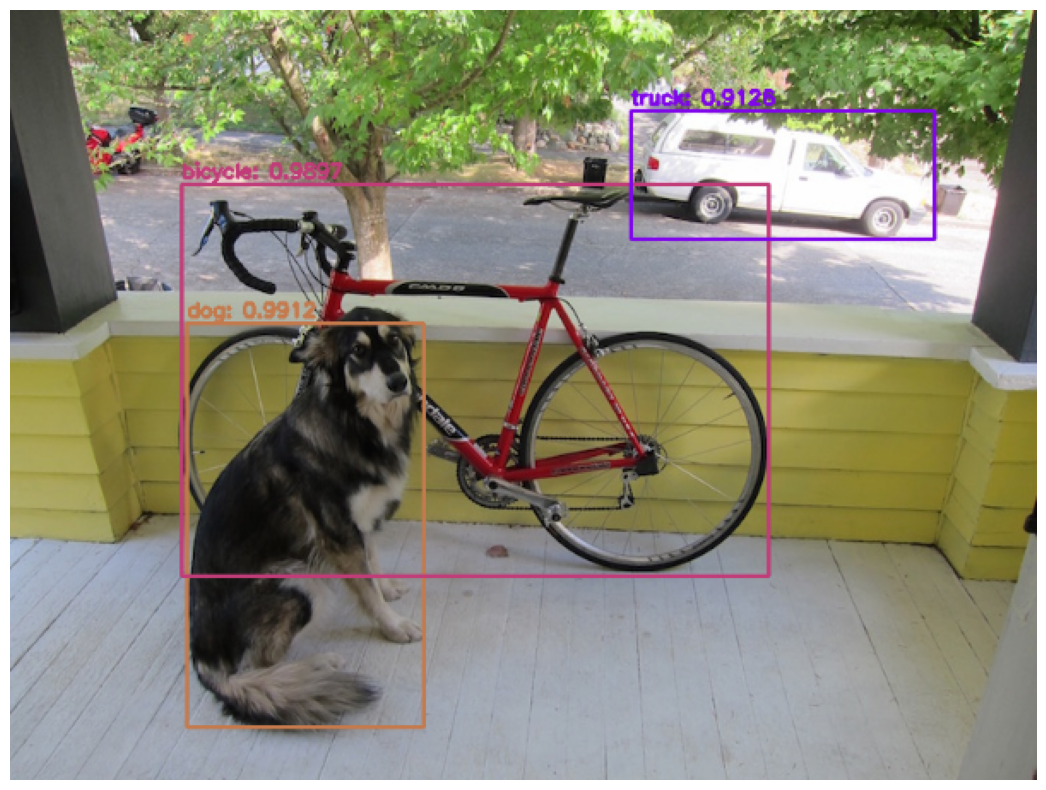

Image shape:  (450, 600, 3)


In [21]:
display_pic(img_2)


In [22]:
def blob_img(net, img, show_text=True):
    start = time.time()
    blob = cv2.dnn.blobFromImage(img, 1/255.00, (416, 416), swapRB=True, crop=False)
    net.setInput(blob)
    layerOutputs = net.forward(ln)
    end = time.time()

    if show_text:
        print("Tempo de processamento: {:0.2f} segundos".format(end - start))

    return net, img, layerOutputs


In [36]:
net, img, layerOutputs = blob_img(net, img)


Tempo de processamento: 0.15 segundos


In [49]:
_thresh = 0.5
_thresh_NMS = 0.3
caixas = []
confiancas = []
IDclasses = []

In [57]:
print(class_ids)

[np.int64(7), np.int64(7), np.int64(7), np.int64(16), np.int64(16), np.int64(7), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(16), np.int64(16), np.int64(7), np.int64(7), np.int64(7), np.int64(16), np.int64(16), np.int64(7), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(16), np.int64(16)]


In [59]:
def deteccoes(detection, _thresh, caixas, confiancas, IDclasses):
    scores = detection[5:0]
    classeID = np.argmax(scores)
    confianca = scores[classeID]

    if confianca > _thresh:
        caixa = detection[0:4] * np.array([W, H, W, H])
        (centerX, centerY, width, height) = caixa.astype("int")
        x = int(centerX - (width / 2))
        y = int(centerY - (height / 2))

        caixas.append([x, y, int(width), int(height)])
        confiancas.append(float(confianca))
        IDclasses.append(classeID)
    
    return caixas, confiancas, IDclasses

In [62]:
for output in layerOutputs:
    for detection in output:
        caixas, confiancas, IDclasses = deteccoes(detection, _thresh, caixas, confiancas, IDclasses)

ValueError: attempt to get argmax of an empty sequence

### Multiplas imagens de um única vez.

In [46]:
import os

pictures = [os.path.join("darknet/data", f) for f in os.listdir("darknet/data") if f.endswith(".jpg")]
print(pictures)

['darknet/data/dog.jpg', 'darknet/data/scream.jpg', 'darknet/data/eagle.jpg', 'darknet/data/person.jpg', 'darknet/data/giraffe.jpg', 'darknet/data/horses.jpg']


In [53]:
for path in pictures:
    try:
        pic = cv2.imread(path)
    except:
        print("Error" + path)
        continue

    pic_copy = pic.copy()
    net, pic, layer_outputs = blob_img(net, pic)

    boxes = []
    confidences = []
    id_classes = []

    for output in layer_outputs:
        for detection in output:
            boxes, confidences, id_classes = deteccoes(detection, _thresh, boxes, confidences, id_classes)

Tempo de processamento: 0.18 segundos


TypeError: cannot unpack non-iterable NoneType object